In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
data = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv')  # Ganti 'nama_file.csv' dengan nama file sesuai dengan dataset Anda

# Memilih hanya fitur pada indeks ke-3
X = data.iloc[:, [3]].values  

# Memisahkan variabel dependen (target)
y = data.iloc[:, 2].values 

In [21]:
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Langkah 3: Membangun model ANN
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer tanpa fungsi aktivasi untuk regresi

In [23]:
# Langkah 4: Melatih model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
6/6 [==============================] - 1s 3ms/step - loss: 4437215543296.0000
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 4045230571520.0000
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 3702866051072.0000
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 3359008096256.0000
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 3021791297536.0000
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 2704085614592.0000
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 2400340148224.0000
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 2081640677376.0000
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 1755963588608.0000
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 1450403299328.0000
Epoch 11/100
6/6 [==============================] - 0s 3ms/step - loss: 1160881635328.0000
Epoch 12

2/2 [==============================] - 0s 2ms/step
Mean Absolute Error: 253178.00841666668
Mean Squared Error: 130263284495.68155
Root Mean Squared Error: 360920.0527757935


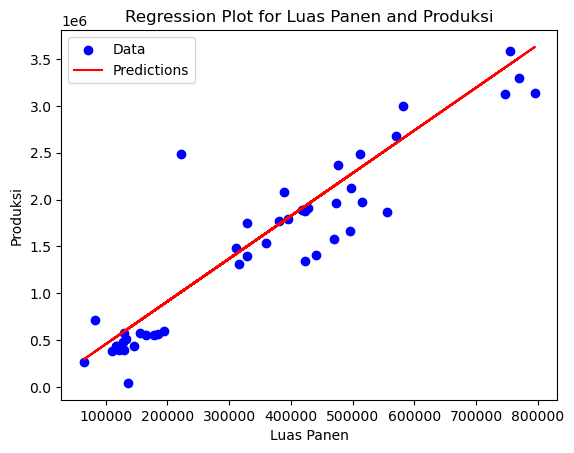

In [24]:
# Langkah 5: Evaluasi kinerja model
y_pred = model.predict(X_test)
# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Membuat scatter plot untuk Luas Panen dan Produksi
plt.scatter(X_test, y_test, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', label='Predictions')
plt.title('Regression Plot for Luas Panen and Produksi')
plt.xlabel('Luas Panen')
plt.ylabel('Produksi')
plt.legend()
plt.show()
